In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import myUtils
import EfficientNet
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



In [3]:
# Direct download from original source (Institut für Neuroinformatik)
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip

# Unzip both files
!unzip GTSRB_Final_Training_Images.zip
!unzip GTSRB_Final_Test_Images.zip

# Cleanup (optional)
!rm *.zip

print("Dataset downloaded and extracted!")

--2025-02-02 19:35:13--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  1.86MB/s    in 2m 2s   

2025-02-02 19:37:15 (2.17 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]

--2025-02-02 19:37:16--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.8

In [3]:
data_dir = "GTSRB/Final_Training/Images"  # Path to training folder
test_dir = "GTSRB/Final_Test/Images"    # Path to testing folder
batch_size = 32
target_size = (240, 240)


# Define augmentation for training data
train_datagen = ImageDataGenerator(          # Normalize pixel values to [0, 1]
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=False,
    validation_split=0.2      # Reserve 20% for validation
)

# Generator for validation (no augmentation, same normalization)
val_datagen = ImageDataGenerator(           # Match training normalization
    validation_split=0.1
)

# Generator for testing (no augmentation, no split)
test_datagen = ImageDataGenerator(
    validation_split = 0.1
)

# Training generator (from training folder)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="sparse",
    subset="training",
    seed=42
)

# Validation generator (from training folder)
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="sparse",
    subset="validation",
    seed=42
)

# Test generator (from test folder - no subsetting)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="sparse",
    subset="validation",
    shuffle=False  # Keep test data in original order
)

Found 31368 images belonging to 43 classes.
Found 3920 images belonging to 43 classes.
Found 3920 images belonging to 43 classes.


In [4]:
model = EfficientNet.efficientNet(input_shape=(240, 240, 3), num_classes=43)

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.0753 - loss: 3.5774

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 685s 698ms/step - accuracy: 0.0753 - loss: 3.5772 - val_accuracy: 0.1556 - val_loss: 3.0835
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 605s 617ms/step - accuracy: 0.5142 - loss: 1.6127 - val_accuracy: 0.9168 - val_loss: 0.2754
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 619s 614ms/step - accuracy: 0.9336 - loss: 0.2114 - val_accuracy: 0.8770 - val_loss: 0.4082
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 601s 612ms/step - accuracy: 0.9688 - loss: 0.1056 - val_accuracy: 0.9429 - val_loss: 0.2294
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 626s 617ms/step - accuracy: 0.9745 - loss: 0.0827 - val_accuracy: 0.9666 - val_loss: 0.1270
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 557s 551ms/step - accuracy: 0.9820 - loss: 0.0541 - val_accuracy: 0.9630 - val_loss: 0.1623
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 529s 539ms/step - accuracy: 0.9835 - loss: 0.0532 - val_accuracy: 0.9579 - val_loss: 0.1825
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 563s 540ms/step - accuracy: 0.9863 - loss: 0.04

In [16]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

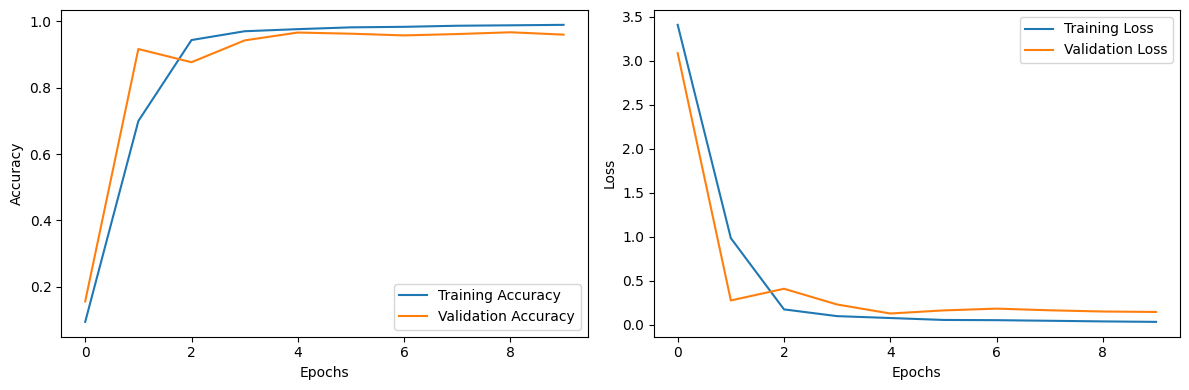

In [17]:
plot_history(history)

In [19]:
model.predict(test_generator,batch_size = batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


123/123 ━━━━━━━━━━━━━━━━━━━━ 27s 157ms/step


array([[9.2341900e-01, 7.6497234e-02, 5.5469598e-09, ..., 7.3140910e-08,
        2.4187733e-11, 2.3878258e-07],
       [8.7718153e-01, 1.2271009e-01, 2.9072976e-07, ..., 4.0579298e-06,
        6.1009788e-09, 4.7177164e-06],
       [9.9924892e-01, 7.3016970e-04, 1.7232947e-10, ..., 4.5595101e-07,
        2.3076158e-10, 1.0335322e-07],
       ...,
       [8.9075467e-16, 1.4185624e-11, 5.6215235e-15, ..., 3.5121573e-17,
        1.6899671e-09, 9.9999821e-01],
       [9.4324424e-16, 3.5005809e-12, 6.4305513e-16, ..., 2.2153381e-17,
        2.5581337e-10, 9.9999964e-01],
       [1.7075334e-14, 9.2724980e-11, 3.5155619e-13, ..., 1.1879054e-15,
        5.6992073e-09, 9.9996185e-01]], dtype=float32)

In [2]:
# GTSRB Class ID to Sign Name Mapping (43 classes)
GTSRB_CLASSES = {
    0: "Speed limit 20",
    1: "Speed limit 30",
    2: "Speed limit 50",
    3: "Speed limit 60",
    4: "Speed limit 70",
    5: "Speed limit 80",
    6: "End of speed limit 80",
    7: "Speed limit 100",
    8: "Speed limit 120",
    9: "No passing",
    10: "No passing for vehicles over 3.5 tons",
    11: "Right-of-way at next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles over 3.5 tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve left",
    20: "Dangerous curve right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing for vehicles over 3.5 tons"
}

In [21]:
model.save("TrafficSigns_EfficientNetB1.keras")

In [30]:

def predict_traffic_sign(img_input, model, class_mapping=GTSRB_CLASSES):
    """
    Accepts either:
    - Tensor (rank 3/4)
    - Bytes (raw image bytes)
    - File path (string)
    """
   
    prop = model.predict(img_input)
    print(prop.shape)
    class_id = np.argmax(prop)
    class_name = class_mapping[class_id]
    return  class_name, prop[0][class_id]

In [21]:
from tensorflow.keras.models import load_model

In [15]:
model = load_model("Models/TrafficSigns_EfficientNetB1.keras")

In [36]:
import Attacks.Utils as utils

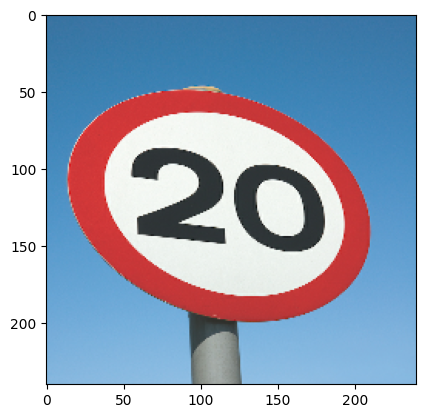

In [46]:
img = utils.read_image("Models/test.jpg", target_size=(240, 240))
plt.imshow(img/255.0)
img.shape
img = np.expand_dims(img, axis=0)

In [47]:
print(predict_traffic_sign(img, model, GTSRB_CLASSES))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
(1, 43)
('Speed limit 20', 0.9830088)
